# Multiclass Fish Image Classification
## Data Exploration & Preprocessing
### This notebook focuses on exploring the dataset, visualizing images, checking class distribution, and preparing data for model training.


In [6]:
import os

base_dir = "C:/Users/HP/Downloads/Education/Data Science/GUvI/projects/Capstone project 5 All Details A to Z/Multiclass Fish Image Classification/data"

train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")


In [7]:
classes = os.listdir(train_dir)
print(f"Classes ({len(classes)}): {classes}")


Classes (11): ['animal fish', 'animal fish bass', 'black_sea_sprat', 'gilt_head_bream', 'hourse_mackerel', 'red_mullet', 'red_sea_bream', 'sea_bass', 'shrimp', 'striped_red_mullet', 'trout']


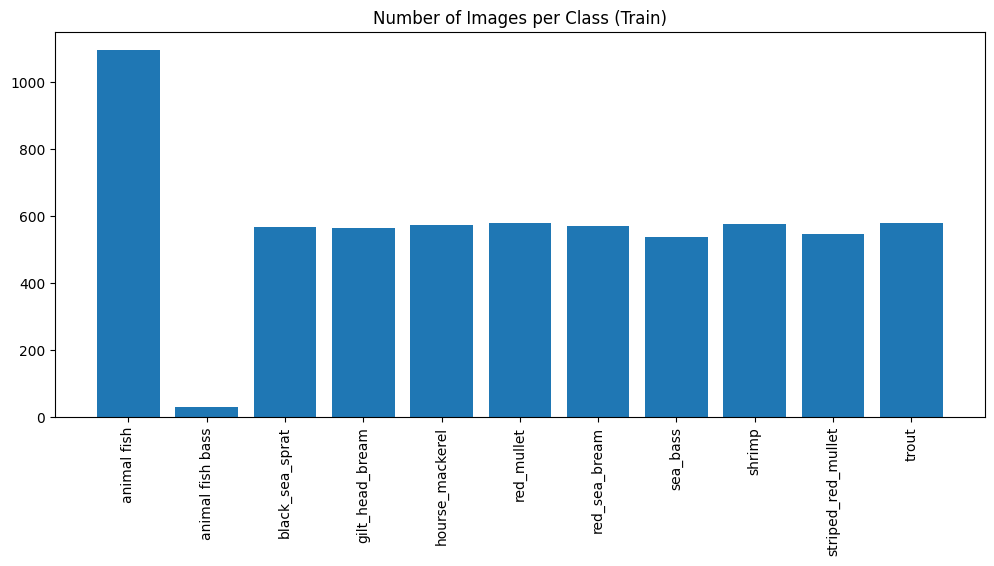

In [8]:
import matplotlib.pyplot as plt

class_counts = {cls: len(os.listdir(os.path.join(train_dir, cls))) for cls in classes}

plt.figure(figsize=(12,5))
plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=90)
plt.title("Number of Images per Class (Train)")
plt.show()


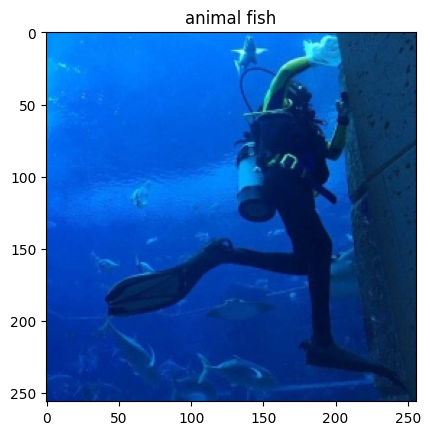

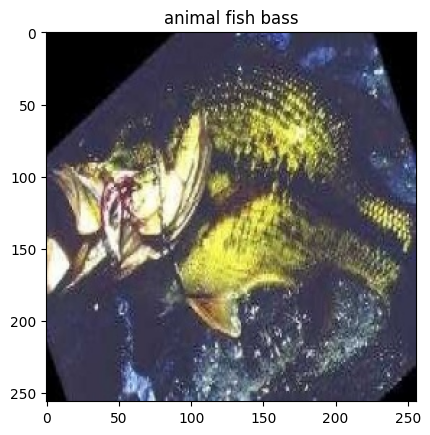

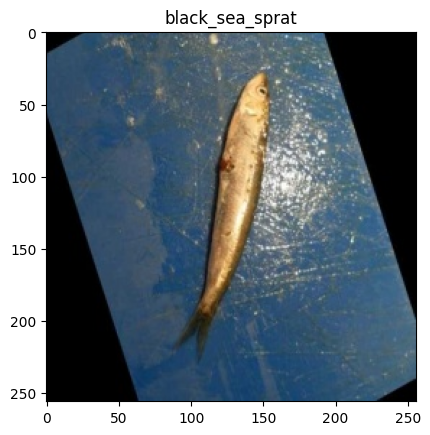

In [9]:
import matplotlib.image as mpimg

for cls in classes[:3]:  # first 3 classes for example
    cls_path = os.path.join(train_dir, cls)
    img_name = os.listdir(cls_path)[0]  # first image
    img = mpimg.imread(os.path.join(cls_path, img_name))
    plt.imshow(img)
    plt.title(cls)
    plt.show()


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation and test data should only be rescaled
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [11]:
batch_size = 32
img_size = (224, 224)  # standard size for CNNs

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


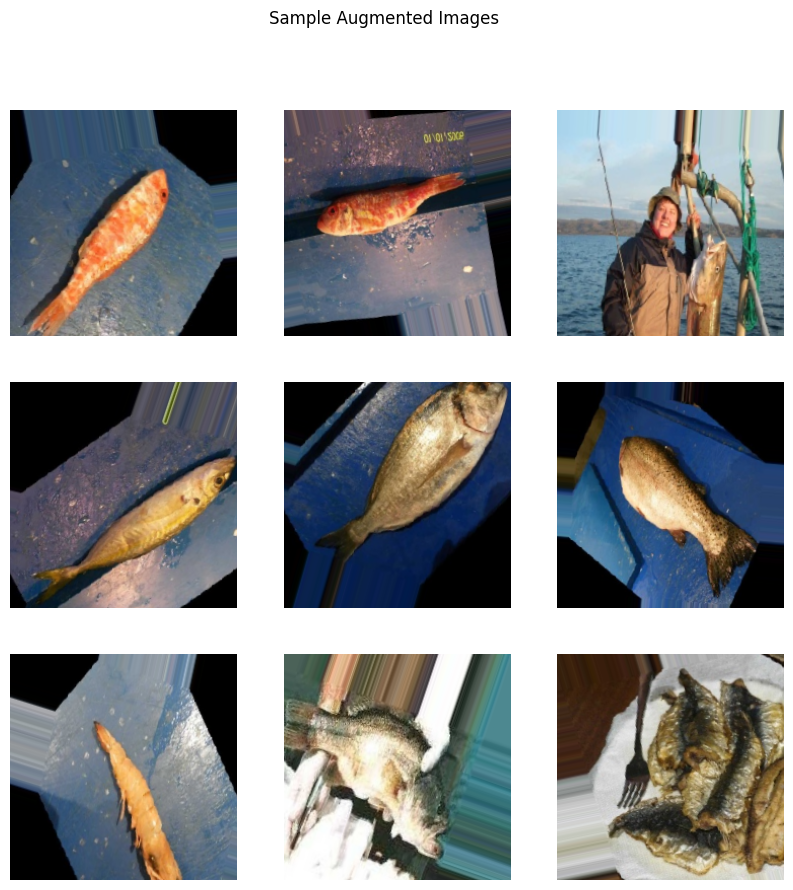

In [12]:
x_batch, y_batch = next(train_generator)

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_batch[i])
    plt.axis('off')
plt.suptitle('Sample Augmented Images')
plt.show()
